## Packages

In [1]:
'''
#UNCOMMENT AND RUN THESE TO INSTALL ANY MISSING PACKAGES
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6
!brew install proj geos
!pip3 install --upgrade pyshp
# shapely needs to be built from source to link to geos. If it is already
# installed, uninstall it by: pip3 uninstall shapely
!pip install --no-binary shapely shapely --force
!apt-get install libproj-dev proj-data proj-bin  
!apt-get install libgeos-dev 
!pip install cython
!sudo pip install cartopy

#Or run on anaconda
#conda install -c conda-forge cartopy
'''

'\n#UNCOMMENT AND RUN THESE TO INSTALL ANY MISSING PACKAGES\n!apt-get install -q libgeos-3.5.0\n!apt-get install -q libgeos-dev\n!pip install -q https://github.com/matplotlib/basemap/archive/master.zip\n!pip install -q pyproj==1.9.6\n!brew install proj geos\n!pip3 install --upgrade pyshp\n# shapely needs to be built from source to link to geos. If it is already\n# installed, uninstall it by: pip3 uninstall shapely\n!pip install --no-binary shapely shapely --force\n!apt-get install libproj-dev proj-data proj-bin  \n!apt-get install libgeos-dev \n!pip install cython\n!sudo pip install cartopy\n\n#Or run on anaconda\n#conda install -c conda-forge cartopy\n'

# Cartopy Examples

In [2]:
import cartopy.crs as ccrs
import cartopy

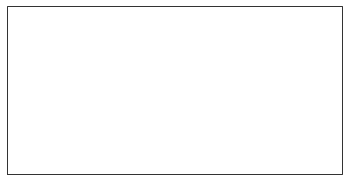

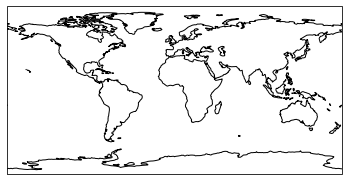

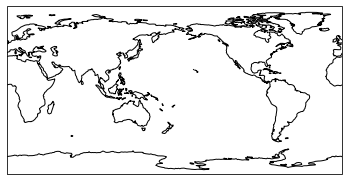

In [3]:
ccrs.PlateCarree()

%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
#ccrs.PlateCarree?

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

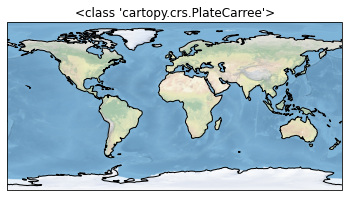

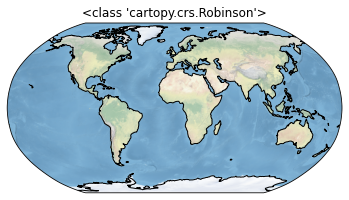

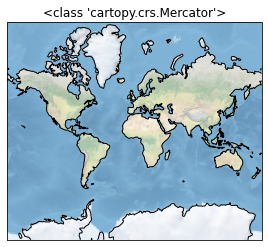

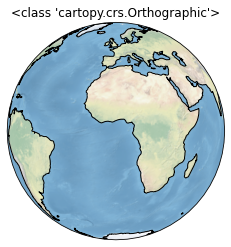

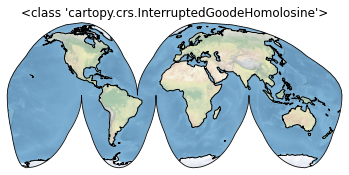

In [4]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

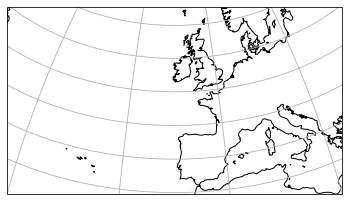

In [5]:
#ax.set_extent?
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

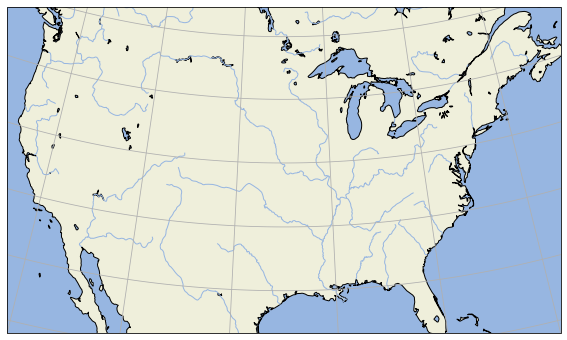

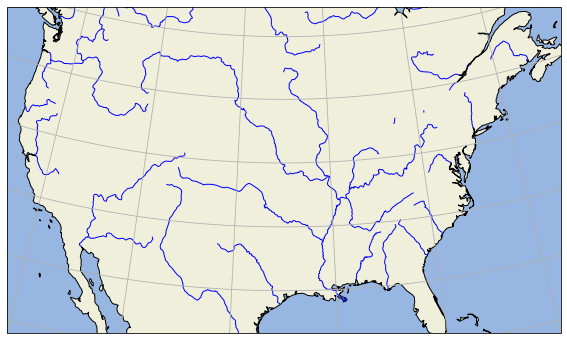

In [6]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

In [7]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

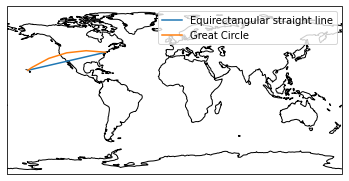

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

C:\Users\Sophie\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


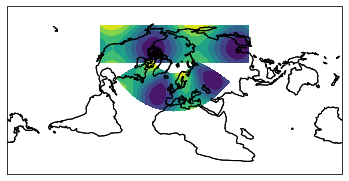

In [9]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

Text(-117, 33, 'San Diego')

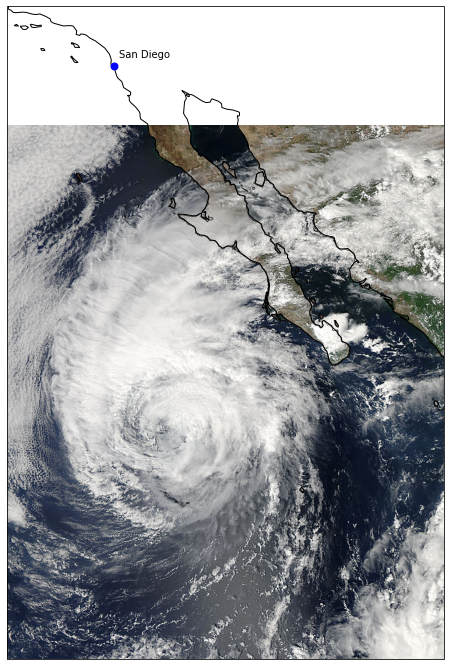

In [10]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())


## NetCDF Files

C:\Users\Sophie\anaconda3\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
C:\Users\Sophie\anaconda3\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


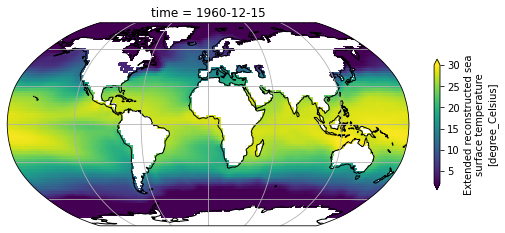

In [11]:
import xarray as xr
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

sst = ds.sst.sel(time='2000-01-01', method='nearest')
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

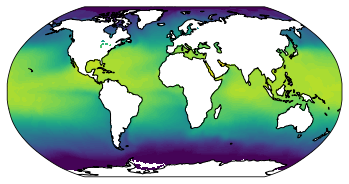

In [12]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )
dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.Robinson())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

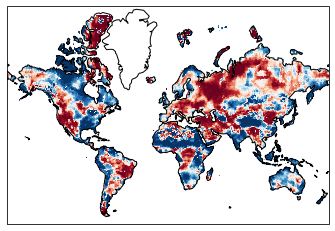

In [13]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join('GRACEDADM_CLSM025_GL_7D.A20210628.020.nc4')
dataset = netcdf_dataset(fname)
lat_glo = dataset.variables['lat'][:]
lon_glo = dataset.variables['lon'][:]
lon_glo, lat_glo = np.meshgrid(lon_glo, lat_glo);

gws_inst = dataset.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = dataset.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = dataset.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

gws_filled_data_glo = gws_inst.filled(fill_value=np.nan)
rtzsm_filled_data_glo = rtzsm_inst.filled(fill_value=np.nan)
sfsm_filled_data_glo = sfsm_inst.filled(fill_value=np.nan)
ax = plt.axes(projection=ccrs.Mercator())

plt.contourf(lon_glo, lat_glo, gws_filled_data_glo[0], 60, transform=ccrs.PlateCarree(), vmin=0.0,vmax=100, cmap = 'RdBu')

ax.coastlines()

plt.show()

C:\Users\Sophie\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


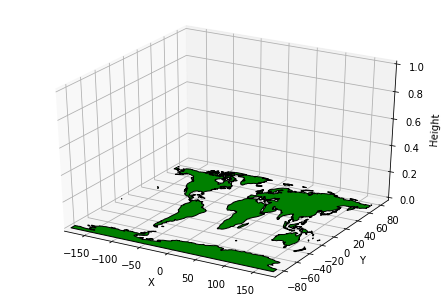

In [1]:
import itertools

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection, PolyCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs


fig = plt.figure()
ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])
ax.set_zlim(bottom=0)


concat = lambda iterable: list(itertools.chain.from_iterable(iterable))

target_projection = ccrs.PlateCarree()

feature = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]

paths = concat(geos_to_path(geom) for geom in geoms)

polys = concat(path.to_polygons() for path in paths)

lc = PolyCollection(polys, edgecolor='black',
                    facecolor='green', closed=False)

ax.add_collection3d(lc)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()